Example notebook showing how to use the MCMC sampler (currently in development)

In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import emcee

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import MCMCSampler
from nnest.likelihoods import *
from nnest.priors import *

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Likelihood
#prior = UniformPrior(2, -5, 5)
#like = Himmelblau(2)
#prior = UniformPrior(2, -2, 12)
#like = Rosenbrock(2)
#prior = UniformPrior(2, -5, 5)
#like = Gaussian(2, 0.9)
#prior = UniformPrior(2, -15, 15)
#like = Eggbox(2)
#prior = UniformPrior(2, -3, 3)
#like = GaussianShell(2)
#prior = UniformPrior(2, -8, 8)
#like = GaussianMix(2)
prior = UniformPrior(2, [-7, -3], [7, 3])
like = DoubleGaussianShell(2, centers=[[-4.0, 0.0], [4.0, 0.0]])
#prior = UniformPrior(4, [-7, -3, -3, -3], [7, 3, 3, 3])
#like = DoubleGaussianShell(4, centers=[[-4.0, 0.0, 0.0, 0.0], [4.0, 0.0, 0.0, 0.0]])

In [6]:
sampler = MCMCSampler(like.x_dim, like, hidden_dim=16, num_blocks=3, flow='spline', prior=prior, run_num=1)

[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=23, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
        

In [7]:
init_samples = sampler._init_samples(temperature=1.0, num_chains=50, propose_scale=1.0)

[nnest.sampler] [INFO] Acceptance [0.7720] min ESS [0.2851] max ESS [0.9383] average jump distance [0.8223]


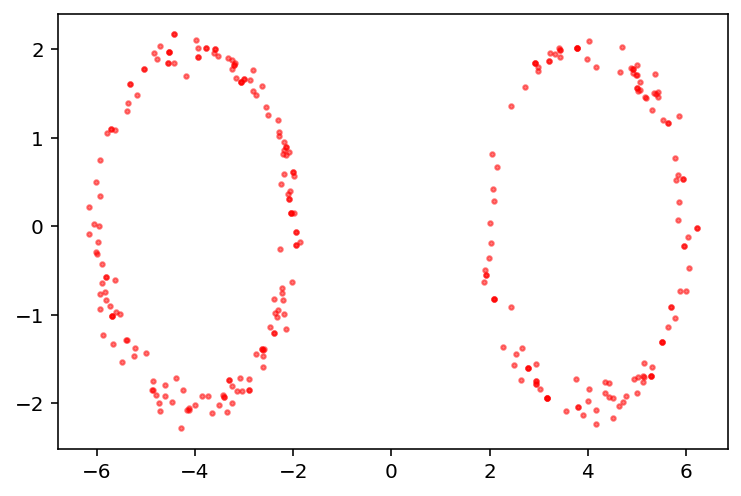

In [8]:
if like.x_dim == 2:
    plt.scatter(init_samples[:, 0], init_samples[:, 1], c='r', s=5, alpha=0.5)
    plt.show()

In [9]:
like.num_evaluations

7550

In [10]:
sampler.run(init_samples=init_samples)

[nnest.sampler] [INFO] Alpha [0.7071]
[nnest.trainer] [INFO] Number of training samples [300]
[nnest.trainer] [INFO] Training jitter [0.1620]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0340] validation loss [0.0951]
[nnest.trainer] [INFO] Epoch [50] train loss [0.0304] validation loss [0.0857]
[nnest.trainer] [INFO] Epoch [100] train loss [0.0278] validation loss [0.0788]
[nnest.trainer] [INFO] Epoch [150] train loss [0.0260] validation loss [0.0730]
[nnest.trainer] [INFO] Epoch [200] train loss [0.0250] validation loss [0.0687]
[nnest.trainer] [INFO] Epoch [250] train loss [0.0240] validation loss [0.0651]
[nnest.trainer] [INFO] Epoch [300] train loss [0.0233] validation loss [0.0634]
[nnest.trainer] [INFO] Epoch [350] train loss [0.0238] validation loss [0.0620]
[nnest.trainer] [INFO] Epoch [400] train loss [0.0232] validation loss [0.0605]
[nnest.trainer] [INFO] Epoch [450] train loss [0.0234] validation loss [0.0601]
[nnest.trainer] [INFO] Epoch [500] train loss [0.0232] valida

[nnest.sampler] [INFO] MCMC step [2600], ncalls [8824] 
[nnest.sampler] [INFO] Acceptance [0.4541] min ESS [124.7942] max ESS [134.7379] average jump distance [0.3595]
[nnest.sampler] [INFO] MCMC step [2800], ncalls [9450] 
[nnest.sampler] [INFO] Acceptance [0.4509] min ESS [136.5467] max ESS [147.0507] average jump distance [0.3576]
[nnest.sampler] [INFO] MCMC step [3000], ncalls [10141] 
[nnest.sampler] [INFO] Acceptance [0.4529] min ESS [143.7138] max ESS [152.5511] average jump distance [0.3578]
[nnest.sampler] [INFO] MCMC step [3200], ncalls [10839] 
[nnest.sampler] [INFO] Acceptance [0.4529] min ESS [152.1327] max ESS [158.9883] average jump distance [0.3575]
[nnest.sampler] [INFO] MCMC step [3400], ncalls [11497] 
[nnest.sampler] [INFO] Acceptance [0.4508] min ESS [166.1459] max ESS [170.4893] average jump distance [0.3573]
[nnest.sampler] [INFO] MCMC step [3600], ncalls [12179] 
[nnest.sampler] [INFO] Acceptance [0.4488] min ESS [174.0228] max ESS [175.8056] average jump distan

In [11]:
samples = [sampler.samples[i, :, :].squeeze() for i in range(sampler.samples.shape[0])]
latent_samples = [sampler.latent_samples[i, :, :].squeeze() for i in range(sampler.latent_samples.shape[0])]
loglikes = [sampler.loglikes[i, :].squeeze() for i in range(sampler.loglikes.shape[0])]

In [12]:
mc = MCSamples(samples=samples, loglikes=loglikes)

Removed no burn in


In [13]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())
print(mc.getConvergeTests())

1249.6896159477692
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1     -9.4088214E-02  4.3661903E+00 -5.1886419E+00  5.1767542E+00  two   -5.9974501E+00  6.0154862E+00  two   -6.1157662E+00  6.1383041E+00  two     p_{1}
param2     -2.9534398E-02  1.4624174E+00 -2.1388708E+00  2.1147361E+00  two   -2.0876829E+00  2.0614814E+00  two   -2.1672210E+00  2.1460707E+00  two     p_{2}

Parameter autocorrelation lengths (effective number of samples N_eff = tot weight/weight length)

            Weight Length   Sample length           N_eff
param1           1.92E+01           19.18            1303
param2           1.86E+01           18.61            1343


mean convergence stats using remaining chains
param sqrt(var(chain mean)/mean(chain var))

param1        0.1176  p_{1}
param2        0.0835  p_{2}

var(mean)/mean(var) for eigenvalues of covari

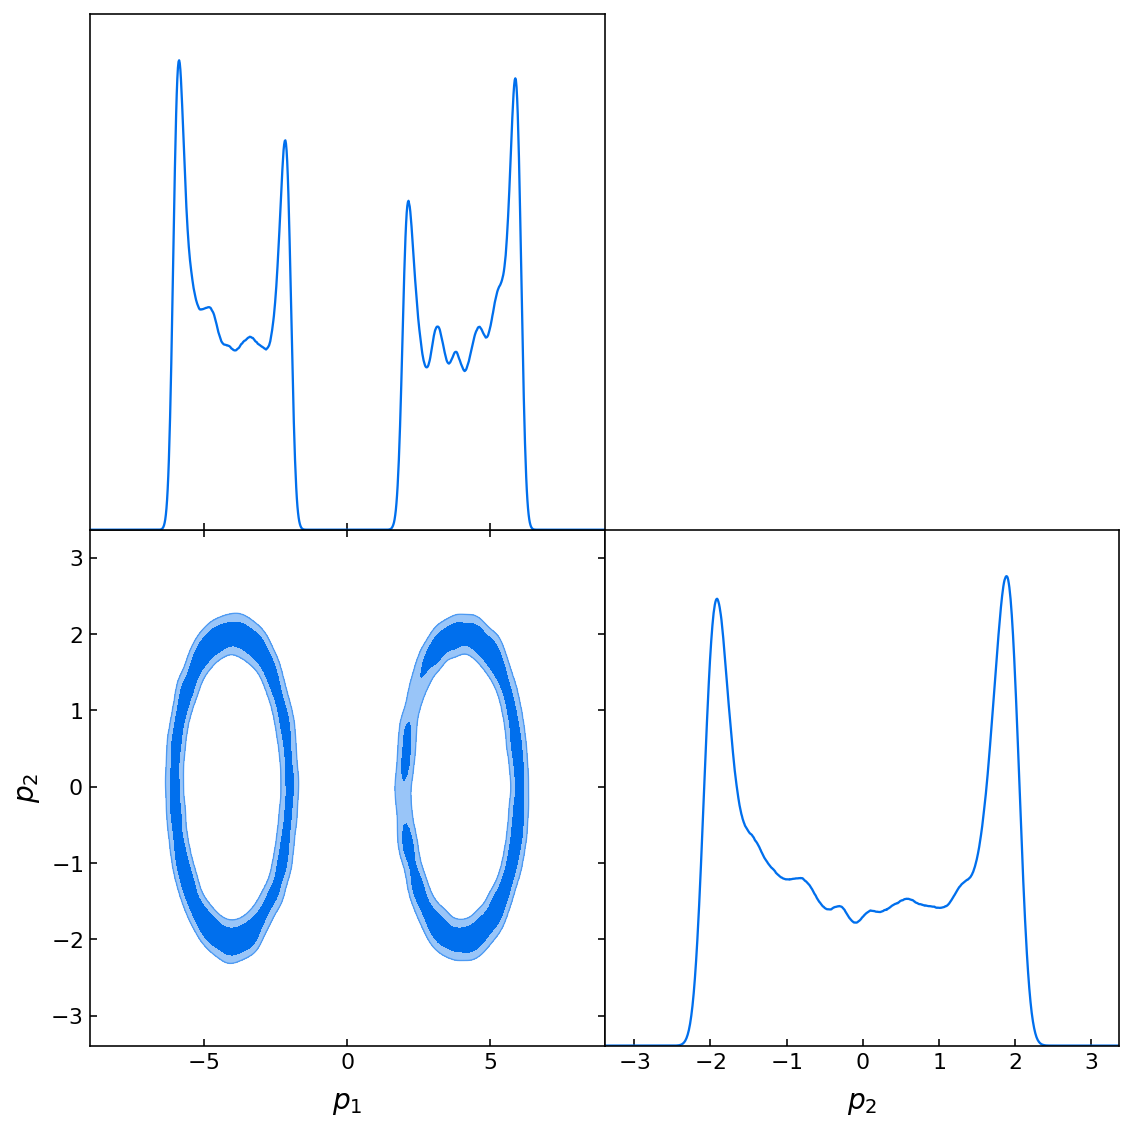

In [14]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)

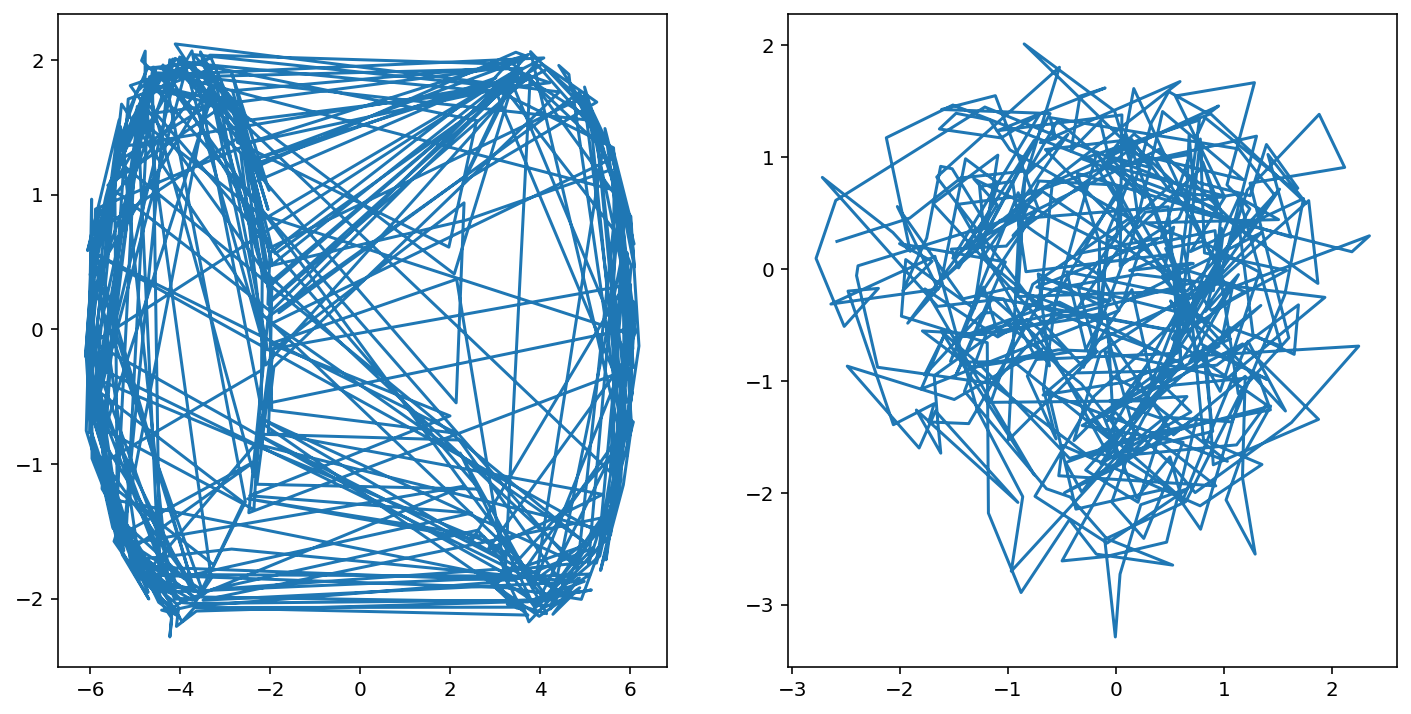

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(samples[0][0:1000,0], samples[0][0:1000,1])
ax[1].plot(latent_samples[0][0:1000,0], latent_samples[0][0:1000,1])
plt.show()

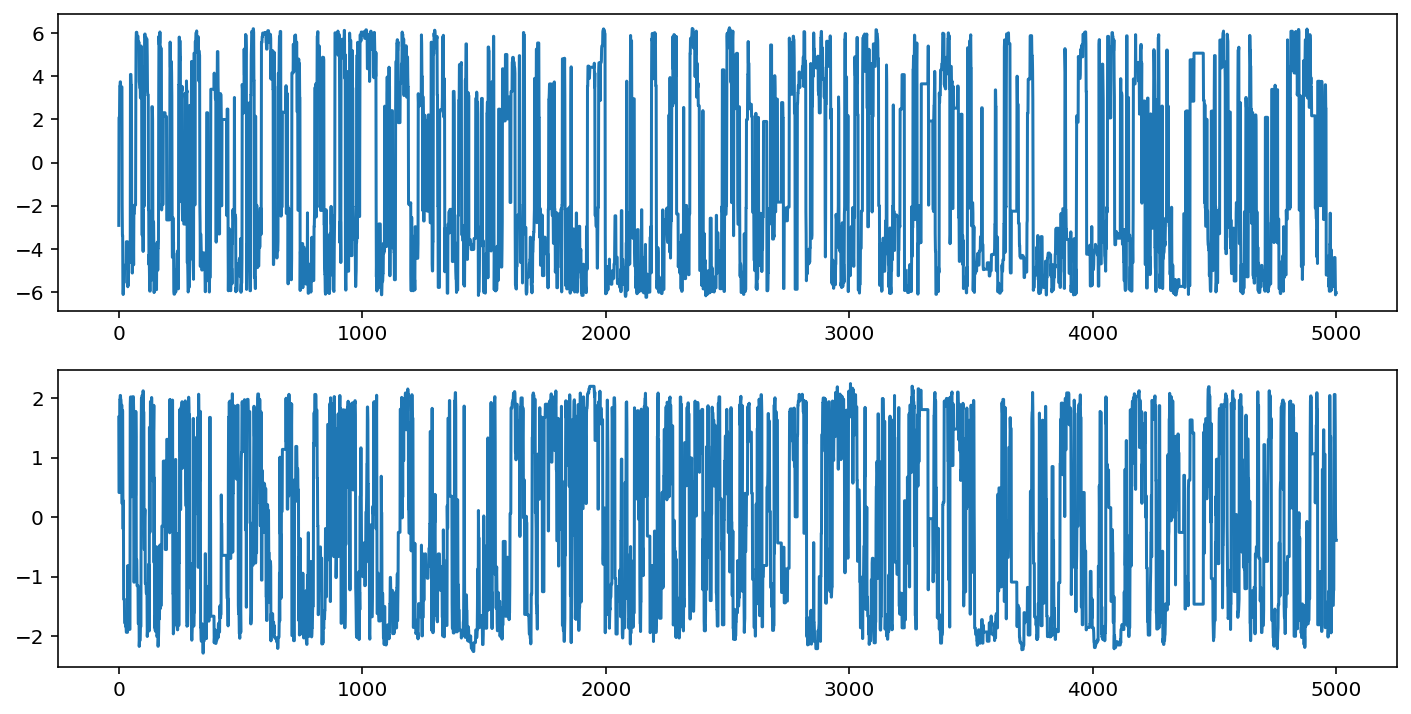

In [16]:
fig, ax = plt.subplots(like.x_dim, 1, figsize=(6*like.x_dim,6))
for i in range(like.x_dim):
    ax[i].plot(samples[0][:,i])
plt.show()